In [1]:
# convert categorial features to numerical
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('airline_clnd.csv')
label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Customer_Type'] = label_encoder.fit_transform(df['Customer_Type'])
df['Type_of_Travel'] = label_encoder.fit_transform(df['Type_of_Travel'])
df['satisfaction'] = label_encoder.fit_transform(df['satisfaction'])
df = pd.get_dummies(df, columns=['Class'])
df.drop(['Class_Eco Plus'], axis=1, inplace=True)
output_filename = 'airline_clnd_modified.csv'
df.to_csv(output_filename, index=False)  
# print(df.head())


In [2]:
# Ensure you have statsmodels installed
# !pip install statsmodels

In [3]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error,roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import statsmodels.api as sm


# Load the dataset
data = pd.read_csv('airline_clnd_modified.csv')
#######################################################Removing features

# columns_to_remove = ['Gate_location', 'Departure_Delay_in_Minutes','Ease_of_Online_booking']
# data_cleaned = data.drop(columns=columns_to_remove, axis=1)  # `axis=1` specifies removing columns
# data=data_cleaned

############################################################

target = 'satisfaction'  
features = [col for col in data.columns if col not in ['SR', 'id', target]]




# Impute missing values with the mean for numerical columns
missing_data = data.isnull().sum()
imputer = SimpleImputer(strategy='mean')  
data_imputed = data.copy()  
data_imputed[features] = imputer.fit_transform(data[features])  
assert not data_imputed.isnull().values.any(), "Data still contains NaNs after imputation"

X = data_imputed[features]  
y = data_imputed[target]  

# Standardize the features
scaler = StandardScaler()  
X = scaler.fit_transform(X)



In [4]:
# # Data analysis phase
# # Scatter plot between each feature and the other
# directory = 'features_analysis_scatter'
# os.makedirs(directory, exist_ok=True)  


# #  plot between each feature and y
# directory2 = 'features_analysis_with_y'
# os.makedirs(directory2, exist_ok=True)  

# directory4 = 'scatter_plots_by_satisfaction'
# os.makedirs(directory4, exist_ok=True)  

# # Line plot between each feature and the other
# directory3 = 'features_analysis_line'
# os.makedirs(directory3, exist_ok=True)  

# def sanitize_filename(name):
#     return name.replace('/', '_').replace('\\', '_').replace(' ', '_')


# for i, feature1 in enumerate(features):
#     for j, feature2 in enumerate(features):
#         if i < j: 
#             plt.figure()  
#             sns.scatterplot(x=data[feature1], y=data[feature2])  
#             plt.title(f'{feature2} vs {feature1}')  
#             plt.xlabel(feature1)  
#             plt.ylabel(feature2) 
#             sanitized_feature1 = sanitize_filename(feature1)
#             sanitized_feature2 = sanitize_filename(feature2)
#             plot_filename = f'{directory}/{sanitized_feature1}_vs_{sanitized_feature2}.png'
#             plt.savefig(plot_filename)  
#             plt.close()  

# for i, feature1 in enumerate(features):
#     for j, feature2 in enumerate(features):
#         if i < j: 
#             plt.figure()  
#             sns.lineplot(x=data[feature1], y=data[feature2]) 
#             plt.title(f'{feature2} vs {feature1}')  
#             plt.xlabel(feature1)  
#             plt.ylabel(feature2)      
#             sanitized_feature1 = sanitize_filename(feature1)
#             sanitized_feature2 = sanitize_filename(feature2)
#             plot_filename = f'{directory3}/{sanitized_feature1}_vs_{sanitized_feature2}.png'
#             plt.savefig(plot_filename)  
#             plt.close()  

# for feature in features:
#     plt.figure(figsize=(8, 6))  
#     sns.histplot(data, x=feature, hue=target, kde=False, multiple='dodge', stat='count') 
#     plt.title(f'{feature} Distribution by Satisfaction')  
#     plt.xlabel(feature) 
#     plt.ylabel('Frequency') 
#     sanitized_feature1 = sanitize_filename(feature)
#     plot_filename = f'{directory2}/{sanitized_feature1}_vs_Satisfaction.png'
#     plt.savefig(plot_filename)  
#     plt.close()  

# for feature in features:
#     plt.figure(figsize=(8, 6))  
#     sns.lineplot(
#         x=data[feature], 
#         y=data[target], 
#     )
#     plt.title(f'{feature} by Satisfaction')  
#     plt.xlabel(feature)  
#     plt.ylabel('satisfication')  
#     sanitized_feature = sanitize_filename(feature)
#     plot_filename = f'{directory2}/{sanitized_feature}_by_Satisfaction.png'
#     plt.savefig(plot_filename)  
#     plt.close()  


# for feature in features:
#     plt.figure(figsize=(8, 6))  
#     sns.scatterplot(data=data, x=feature, y=target, hue=target, palette='Set1', alpha=0.6) 
#     plt.title(f'Satisfaction vs {feature}')  
#     plt.xlabel(feature)  
#     plt.ylabel('Satisfaction')  
#     counts = data.groupby(target).size() 
#     labels = [f'Satisfaction: {v} (n={counts[v]})' for v in counts.index]  
#     handles, _ = plt.gca().get_legend_handles_labels()  
#     plt.legend(handles, labels)
#     sanitized_feature1 = sanitize_filename(feature)
#     plot_filename = f'{directory4}/{sanitized_feature1}_vs_Satisfaction.png'  
#     plt.savefig(plot_filename)
#     plt.close() 


# Calculate the correlation matrix
correlation_matrix = data.corr()
directory = 'output' 
os.makedirs(directory, exist_ok=True)  
file_path = os.path.join(directory, 'correlation_matrix.txt')  
with open(file_path, 'w') as f:
    f.write("Correlation Matrix:\n")
    f.write(correlation_matrix.to_string())

# print("Correlation Matrix:")
# print(correlation_matrix)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Naive Bayes


Naive Bayes Classifier:
Class 0:
  Prior Probability: 0.5674241786268541


  Mean of Features: [-0.00878688  0.16366464 -0.12188124  0.39356015 -0.26187529 -0.24593171
  0.04247212 -0.14749529  0.00063657 -0.18320678 -0.44208835 -0.30718172
 -0.34848612 -0.28006531 -0.27012803 -0.21747635 -0.2046829  -0.21379959
 -0.26828008  0.04635538  0.0525161  -0.44460024  0.39859175]


  Variance of Features: [0.9996606  1.24202348 1.18720436 1.16773101 0.62795616 0.52834782
 0.97063841 0.74130625 0.87540419 1.02254278 0.71765473 0.97385293
 0.98208467 0.99565776 0.98118768 0.99368769 1.02476791 0.99695796
 1.01730422 1.12425615 1.11800969 0.76314879 0.92142839]



Class 1:
  Prior Probability: 0.4325758213731458


  Mean of Features: [ 0.01611528 -0.2131559   0.15400927 -0.51324866  0.34169377  0.32344607
 -0.05946848  0.19645956  0.00113706  0.23921903  0.57370001  0.39741848
  0.45106775  0.37000193  0.35886552  0.28087     0.27151055  0.2781707
  0.34431756 -0.05862983 -0.06701757  0.57780177

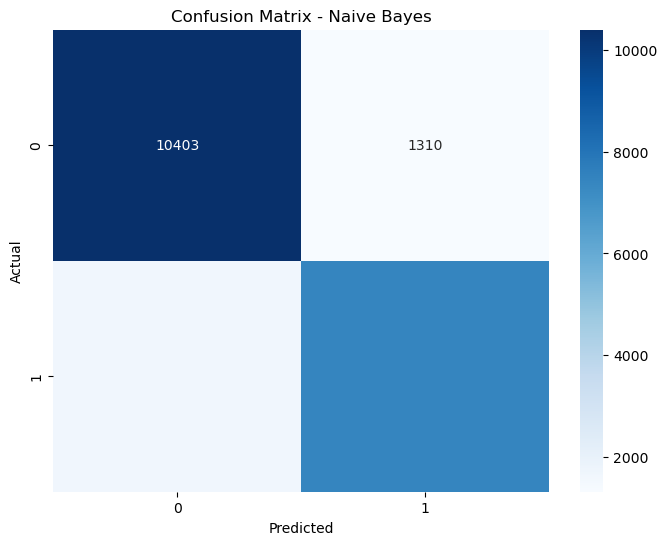

Misclassification Rate for Class 0 (Negative Class): 0.14224532024445408
Misclassification Rate for Class 1 (Positive Class): 0.14224532024445408


In [6]:

nb_classifier = GaussianNB()  
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

class_priors = nb_classifier.class_prior_
class_means = nb_classifier.theta_
class_variances = nb_classifier.var_


print("Naive Bayes Classifier:")
num_classes = len(class_priors)
for i in range(num_classes):
    print(f"Class {i}:")
    print(f"  Prior Probability: {class_priors[i]}")
    print('\n')

    print(f"  Mean of Features: {class_means[i]}")
    print('\n')

    print(f"  Variance of Features: {class_variances[i]}")
    print('\n\n')


print("Accuracy:", accuracy_score(y_test, y_pred_nb)) 
print("Classification Report:\n", classification_report(y_test, y_pred_nb)) 

# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

tp = conf_matrix[1, 1]  
fp = conf_matrix[0, 1]  
tn = conf_matrix[0, 0]  
fn = conf_matrix[1, 0]  
total_pos = tp + fn  
total_neg = tn + fp  

misclassification_rate_pos = (fp + fn) / (total_pos + total_neg)
misclassification_rate_neg = (fp + fn) / (total_pos + total_neg) 

print("Misclassification Rate for Class 0 (Negative Class):", misclassification_rate_neg)
print("Misclassification Rate for Class 1 (Positive Class):", misclassification_rate_pos)


In [7]:
'''
Naive Bayes Classifier:
Misclassification Rate for both classes is 0.14 which is not so high , so accurancy gives us a good indication here
about the model , and f1 score approximately equals accurancy .
'''

'\nNaive Bayes Classifier:\nMisclassification Rate for both classes is 0.14 which is not so high , so accurancy gives us a good indication here\nabout the model , and f1 score approximately equals accurancy .\n'

### Logistic Regression

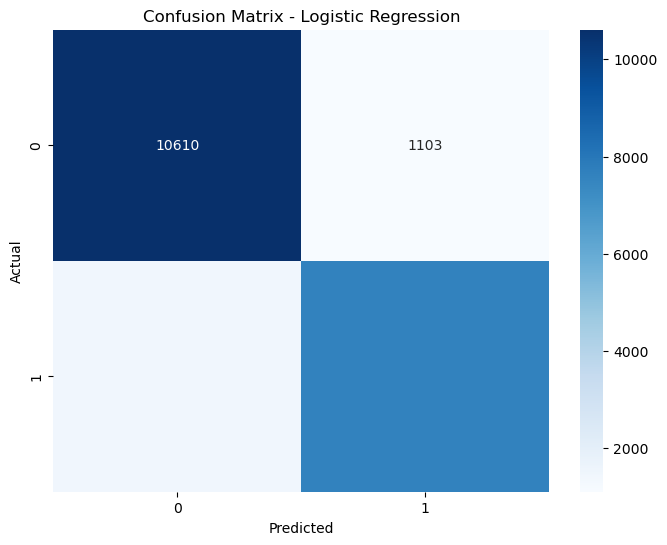

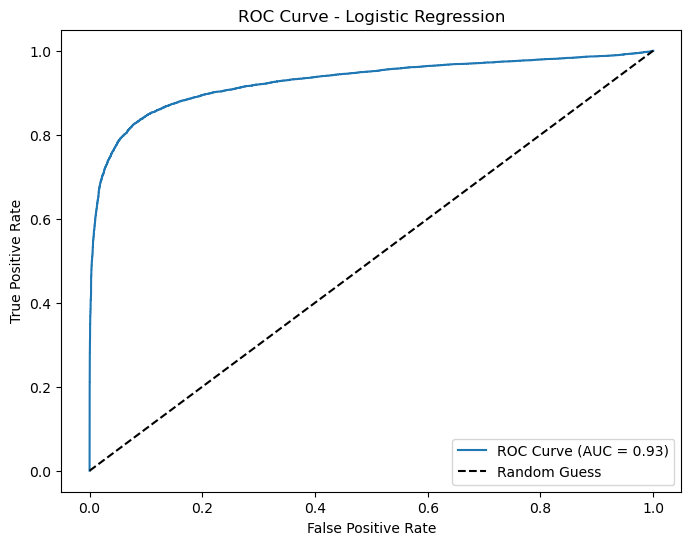

Logistic Regression Summary:
Accuracy: 0.8765699436985708
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89     11713
           1       0.87      0.84      0.86      9068

    accuracy                           0.88     20781
   macro avg       0.88      0.87      0.87     20781
weighted avg       0.88      0.88      0.88     20781

Area Under the Curve (AUC): 0.9274453797222206
Model Coefficients: [ 0.02618162 -0.7809889  -0.12543714 -1.25570493 -0.01714768  0.51587839
 -0.17846334 -0.20658948  0.0361048  -0.02892152  0.8298964   0.08883714
  0.07775466  0.39641602  0.333328    0.15684452  0.40657153  0.13765398
  0.28366956  0.16240454 -0.34908739  0.44206753  0.06556975]
Model Intercept: -0.5075160746265843


In [8]:

### Logistic Regression

logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(X_train, y_train)
y_pred_logreg = logreg_classifier.predict(X_test)
y_pred_probs = logreg_classifier.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred_logreg)
class_report = classification_report(y_test, y_pred_logreg)



# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Calculate ROC and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
auc = roc_auc_score(y_test, y_pred_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

# Display model coefficients and intercept
coefficients = logreg_classifier.coef_[0]
intercept = logreg_classifier.intercept_[0]

print("Logistic Regression Summary:")
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)
print("Area Under the Curve (AUC):", auc)
print("Model Coefficients:", coefficients)
print("Model Intercept:", intercept)




### Linear Regression


In [9]:

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)
print(model.summary())

mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error (MSE): {mse}")




                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     5573.
Date:                Sat, 04 May 2024   Prob (F-statistic):               0.00
Time:                        18:26:20   Log-Likelihood:                -32724.
No. Observations:              103904   AIC:                         6.550e+04
Df Residuals:                  103880   BIC:                         6.573e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4333      0.001    421.255      0.0

### KNN PySpark

In [10]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import mean, stddev, lit
spark = SparkSession.builder.master("local[*]").appName("KNN").getOrCreate()


In [11]:
input_file = "airline_clnd_modified.csv"
df = spark.read.csv(input_file, header=True, inferSchema=True)
boolean_columns = ["Class_Business", "Class_Eco"]

for col in boolean_columns:
    df = df.withColumn(col, when(df[col] == True, 1).otherwise(0))
mean_arrival_delay = df.select(mean("Arrival_Delay_in_Minutes")).collect()[0][0]

print(f"Mean of 'Arrival_Delay_in_Minutes': {mean_arrival_delay:.2f}")

df = df.fillna({ "Arrival_Delay_in_Minutes": mean_arrival_delay })
df = df.withColumnRenamed("Departure/Arrival_time_convenient", "Dep")
features = [col for col in df.columns if col not in ['SR', 'id', target]]
print(features)


# Calculate mean and standard deviation for each column
from pyspark.sql.functions import col, when

mean_std_dict = {}
for col_name in features:
    mean_val = df.select(mean(col(col_name))).collect()[0][0]
    stddev_val = df.select(stddev(col(col_name))).collect()[0][0]
    mean_std_dict[col_name] = (mean_val, stddev_val)

# Standardize each column
for col_name in features:
    mean_val, stddev_val = mean_std_dict[col_name]
    if stddev_val is None or stddev_val == 0:
        standardized_col = lit(0)
    else:
        standardized_col = (col(col_name) - mean_val) / stddev_val
    df = df.withColumn(f"{col_name}", standardized_col)

df.show(5)
train_df, test_df = df.randomSplit([0.9, 0.1], seed=42)
print("Training Data:")
train_df.show(5)

print("Testing Data:")
test_df.show(5)






Mean of 'Arrival_Delay_in_Minutes': 15.18
['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Flight_Distance', 'Inflight_wifi_service', 'Dep', 'Ease_of_Online_booking', 'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment', 'On-board_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service', 'Inflight_service', 'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes', 'Class_Business', 'Class_Eco']
+---+------+-------------------+--------------------+-------------------+------------------+--------------------+---------------------+--------------------+----------------------+--------------------+-------------------+--------------------+-------------------+----------------------+-------------------+--------------------+-------------------+--------------------+-------------------+--------------------+--------------------------+------------------------+------------+-------------------+-------------------+
| SR|    id|    

In [18]:

################################################################################# Don't run
import numpy as np
from collections import Counter

def euclidean_distance(vec1, vec2):
    return float(np.linalg.norm(np.array(vec1) - np.array(vec2)))

output_file_path = "knn_results.txt"

with open(output_file_path, "w") as output_file:

    target = "satisfaction"
    exclude_cols = ['SR', 'id', target]
    features = [col for col in df.columns if col not in exclude_cols]

    def find_knn(test_point, train_rdd, k):
        def distance_mapper(train_row):
            point = tuple(train_row[feature] for feature in features)
            test_point_values = tuple(test_point[feature] for feature in features)
            distance = euclidean_distance(point, test_point_values)
            return (train_row["id"], distance, train_row[target])
        
        distances_rdd = train_rdd.map(distance_mapper)
        knn = distances_rdd.takeOrdered(k, key=lambda x: x[1])  
        return knn

    K = 5

    train_rdd = train_df.rdd

    correct_predictions = 0
    total_test_points = test_df.count()
    i = 0
    for test_point in test_df.collect():
        knn = find_knn(test_point, train_rdd, K)
        
        neighbor_classes = [item[2] for item in knn]  
        predicted_class = Counter(neighbor_classes).most_common(1)[0][0] 
        
        actual_class = test_point[target]
        i += 1
        if predicted_class == actual_class:
            output_file.write(f"Test point {i} correctly classified\n")
            print(f"test point {i} correctly classified")
            correct_predictions += 1
        # if i == 10:
        #     break


    accuracy = correct_predictions / total_test_points

    print(f"Accuracy of KNN with K={K}: {accuracy * 100:.2f}%")

print(f"Results have been written to {output_file_path}")


test point 1 correctly classified
test point 2 correctly classified
test point 3 correctly classified
test point 4 correctly classified
test point 6 correctly classified
test point 7 correctly classified
test point 8 correctly classified
test point 9 correctly classified
test point 10 correctly classified
test point 11 correctly classified
test point 12 correctly classified
test point 14 correctly classified
test point 15 correctly classified
test point 16 correctly classified
test point 17 correctly classified
test point 18 correctly classified
test point 19 correctly classified
test point 20 correctly classified
test point 21 correctly classified
test point 22 correctly classified
test point 23 correctly classified
test point 24 correctly classified
test point 25 correctly classified
test point 26 correctly classified
test point 27 correctly classified
test point 28 correctly classified
test point 29 correctly classified
test point 30 correctly classified
test point 31 correctly clas

### KNN SKlearn

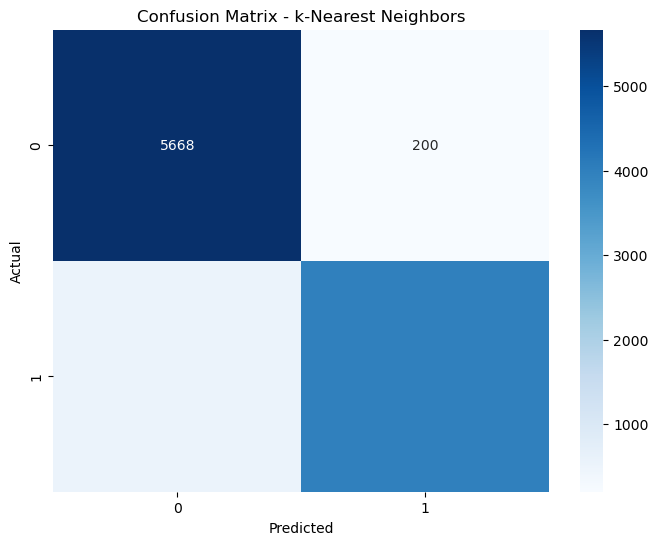

Accuracy: 0.9304205562506015


In [19]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

y_pred_knn = knn_classifier.predict(X_test)
y_pred_probs = knn_classifier.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred_knn)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix - k-Nearest Neighbors")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("Accuracy:", accuracy)
